## Variable "hora" PRUEBA 3

Se verificará con rangos de 4 horas sin alteraciones de variables para verificar la prediccion del modelo

Cargamos las librerias necesarias para la elaboracion y desarrollo de la minería de datos

In [1]:
!pip install plotly
import numpy as np #Operaciones matemáticas rápidas sobre matrices
import pandas as pd #biblioteca de análisis y manipulación de datos para Python
import plotly.express as px
import matplotlib.pyplot as plt #Proporciona una forma de trazado similar a MATLAB. pyplot está diseñado principalmente para gráficos interactivos y casos simples de generación de tramas programáticas. La API orientada a objetos se recomienda para gráficos más complejos.
import seaborn as sns #permite generar fácilmente elegantes gráficos, proporciona una interfaz de alto nivel que es realmente sencilla de aprender.
import statsmodels.api as sm

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')
#Dataset
# ------------------------------------------------------------------------------
df= pd.read_csv('AT2018_NBD.csv')
df1= pd.read_csv('AT2019_NBD.csv')
df2= pd.read_csv('AT2020_NBD.csv')
df=df.append(df1)
df=df.append(df2)
df.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-1-f7909ba238b5>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df1)


,fecha,dia,hora,tipologia,direccion,zona,parroquia_urbana,causas,nro_heridos,nro_fallecidos,latitud,longitud,gravedad,vehiculos_retenidos,senalizacion_existente
0,09-26,miercoles,h13,atropello,cuero y caicedo entre manuel angulo y carlos m...,urbana,punzara,imprudencia del peaton,1,0,NaN,NaN,NaN,NaN,NaN
1,09-27,jueves,h20,atropello,mayas y juan jose samaniego,urbana,sucre,negligencia del conductor,1,0,NaN,NaN,NaN,NaN,NaN
2,09-28,viernes,h18,choque lateral perpendicular,jose martinez ruiz y sixto duran romero,urbana,san sebastian,condiciones climaticas desfavorables,1,0,NaN,NaN,NaN,NaN,NaN
3,09-28,viernes,h21,estrellamiento,pablo palacios y cesar p. ludena,urbana,carigan,fallas mecanicas no previsibles,0,0,NaN,NaN,NaN,NaN,NaN
4,09-29,sabado,h19,choque lateral perpendicular,universitaria y quito,urbana,el sagrario,imprudencia del conductor,0,0,NaN,NaN,NaN,NaN,NaN


Graficamos el mapa de calor de accidentabilidad dentro del cantón Loja

In [2]:
fig = px.density_mapbox(df,lat='latitud', lon='longitud',radius=3,center=dict(lat=-3.99313,lon=-79.20422),zoom=10.5,mapbox_style="open-street-map")

fig.show()

In [3]:
#verifico datos nulos
df.isnull().sum()

fecha                       0
dia                         0
hora                        0
tipologia                   0
direccion                   0
zona                        0
parroquia_urbana            0
causas                      0
nro_heridos                 0
nro_fallecidos              0
latitud                   147
longitud                  147
gravedad                  653
vehiculos_retenidos       653
senalizacion_existente    653
dtype: int64

In [4]:
df=df.loc[:,df.columns!="fecha"]
df=df.loc[:,df.columns!="zona"]
df=df.loc[:,df.columns!="latitud"]
df=df.loc[:,df.columns!="longitud"]
df=df.loc[:,df.columns!="direccion"]
df=df.loc[:,df.columns!="gravedad"]
df=df.loc[:,df.columns!="vehiculos_retenidos"]
df=df.loc[:,df.columns!="senalizacion_existente"]
df=df.loc[:,df.columns!="condicion_calzada"]
df=df.loc[:,df.columns!="condicion_atmosferica"]

In [5]:
df.isnull().sum()

dia                 0
hora                0
tipologia           0
parroquia_urbana    0
causas              0
nro_heridos         0
nro_fallecidos      0
dtype: int64

In [6]:
df.sample(10)

,dia,hora,tipologia,parroquia_urbana,causas,nro_heridos,nro_fallecidos
44,sabado,h16,choque lateral perpendicular,el sagrario,conducir en exceso de velocidad,1,0
105,jueves,h21,arrollamiento,el sagrario,negligencia del conductor,0,1
338,martes,h22,choque lateral perpendicular,el sagrario,conducir en estado de embriaguez,0,0
406,domingo,h01,choque lateral angular,punzara,conducir en estado de embriaguez,1,0
300,sabado,h10,choque lateral perpendicular,san sebastian,imprudencia del conductor,0,0
360,sabado,h00,estrellamiento,punzara,conducir en estado de embriaguez,1,0
200,lunes,h08,atropello,punzara,imprudencia del peaton,1,0
59,domingo,h08,estrellamiento,sucre,conducir en exceso de velocidad,0,0
42,jueves,h06,choque por alcance,punzara,no mantener la distancia reglamentaria,2,0
378,domingo,h02,perdida de carril,sucre,conducir en exceso de velocidad,0,0


In [7]:
df.head()

,dia,hora,tipologia,parroquia_urbana,causas,nro_heridos,nro_fallecidos
0,miercoles,h13,atropello,punzara,imprudencia del peaton,1,0
1,jueves,h20,atropello,sucre,negligencia del conductor,1,0
2,viernes,h18,choque lateral perpendicular,san sebastian,condiciones climaticas desfavorables,1,0
3,viernes,h21,estrellamiento,carigan,fallas mecanicas no previsibles,0,0
4,sabado,h19,choque lateral perpendicular,el sagrario,imprudencia del conductor,0,0


In [8]:
ds=pd.DataFrame(df)
#Presenta el numero de filas
print("El numero de filas(observaciones) es: ",ds.shape[0])

#Presenta el numero de columnas
print("El numero de columnas(variables) es: ",len(ds.columns))

El numero de filas(observaciones) es:  1028
El numero de columnas(variables) es:  7


In [9]:
# tipos de la variables
ds.dtypes

dia                 object
hora                object
tipologia           object
parroquia_urbana    object
causas              object
nro_heridos          int64
nro_fallecidos       int64
dtype: object

In [10]:
df.shape[0]

1028

In [11]:
df['causas'].value_counts()

conducir en estado de embriaguez                  235
imprudencia del conductor                         228
conducir en exceso de velocidad                   220
no ceder el derecho de via                        114
no respetar las senales de transito                67
imprudencia del peaton                             51
no mantener la distancia reglamentaria             43
negligencia del conductor                          17
fallas mecanicas no previsibles                    13
cambio brusco e indebido de carril                 11
condiciones climaticas desfavorables                8
invadir carril de circulacion                       5
razones desconocidas                                5
desatento a la conduccion                           3
cruce de via sin preferencia                        2
perdida de pista                                    2
imprudencia del pasajero                            1
no respetar las ordenes del agente de transito      1
impericia del conductor     

In [12]:
print(df['causas'].unique())# datos en texto

['imprudencia del peaton' 'negligencia del conductor'
 'condiciones climaticas desfavorables' 'fallas mecanicas no previsibles'
 'imprudencia del conductor' 'conducir en estado de embriaguez'
 'no ceder el derecho de via' 'cambio brusco e indebido de carril'
 'no mantener la distancia reglamentaria' 'desatento a la conduccion'
 'no respetar las senales de transito' 'imprudencia del pasajero'
 'cruce de via sin preferencia' 'perdida de pista'
 'conducir en exceso de velocidad' 'invadir carril de circulacion'
 'razones desconocidas' 'no respetar las ordenes del agente de transito'
 'impericia del conductor' 'inobservancia de leyes de transito']


In [13]:
print(df['causas'].unique())# datos en texto

['imprudencia del peaton' 'negligencia del conductor'
 'condiciones climaticas desfavorables' 'fallas mecanicas no previsibles'
 'imprudencia del conductor' 'conducir en estado de embriaguez'
 'no ceder el derecho de via' 'cambio brusco e indebido de carril'
 'no mantener la distancia reglamentaria' 'desatento a la conduccion'
 'no respetar las senales de transito' 'imprudencia del pasajero'
 'cruce de via sin preferencia' 'perdida de pista'
 'conducir en exceso de velocidad' 'invadir carril de circulacion'
 'razones desconocidas' 'no respetar las ordenes del agente de transito'
 'impericia del conductor' 'inobservancia de leyes de transito']


Transformamos los datos a numéricos

In [14]:
df['causas']= df['causas'].apply(lambda x: 
                                    1 if x == 'conducir en estado de embriaguez' else 
                                    2 if x == 'imprudencia del conductor' else 
                                    3 if x == 'no ceder el derecho de via' else
                                    4 if x == 'conducir en exceso de velocidad' else 
                                    5 if x == 'cambio brusco e indebido de carril' else
                                    6 if x == 'fallas mecanicas no previsibles' else
                                    7 if x == 'no respetar las senales de transito' else
                                    8 if x == 'invadir carril de circulacion' else
                                    9 if x == 'imprudencia del peaton' else
                                    10 if x == 'no mantener la distancia reglamentaria' else
                                    11 if x == 'razones desconocidas' else
                                    12 if x == 'condiciones climaticas desfavorables' else
                                    13 if x == 'negligencia del conductor' else
                                    14 if x == 'no respetar las ordenes del agente de transito' else
                                    15 if x == 'impericia del conductor' else
                                    16)


In [15]:
print(df['parroquia_urbana'].unique()) # datos convertidos a numeros enteros

['punzara' 'sucre' 'san sebastian' 'carigan' 'el sagrario' 'el valle']


In [16]:
df['parroquia_urbana']= df['parroquia_urbana'].apply(lambda x: 
                                    1 if x == 'el sagrario' else 
                                    2 if x == 'san sebastian' else 
                                    3 if x == 'el valle' else
                                    4 if x == 'sucre' else 
                                    5 if x == 'punzara' else
                                    6 if x == 'carigan' else
                                    7)

In [17]:
print(df['parroquia_urbana'].unique()) # datos convertidos a numeros enteros

[5 4 2 6 1 3]


In [18]:
print(df['tipologia'].unique()) # datos convertidos a numeros enteros

['atropello' 'choque lateral perpendicular' 'estrellamiento'
 'choque frontal longitudinal' 'choque lateral angular' 'roce negativo'
 'colision' 'choque por alcance' 'roce positivo' 'perdida de carril'
 'choque frontal excentrico' 'caida de pasajero' 'perdida de pista'
 'atipico' 'encunetamiento' 'arrollamiento' 'rozamiento'
 'volcamiento lateral' 'volcamiento longitudinal' 'volcamiento'
 'choque frontal']


In [19]:
#rango de tipologia
df['tipologia']= df['tipologia'].apply(lambda x: 
                                    1 if x == 'arrollamiento' else 
                                    2 if x == 'atipico' else 
                                    3 if x == 'atropello' else
                                    4 if x == 'caida de pasajero' else 
                                    5 if x == 'choque frontal' else
                                    5 if x == 'choque frontal excentrico' else
                                    5 if x == 'choque frontal longitudinal' else
                                    5 if x == 'choque lateral angular' else
                                    5 if x == 'choque lateral perpendicular' else
                                    5 if x == 'choque por alcance' else
                                    6 if x == 'colision' else
                                    7 if x == 'encunetamiento' else
                                    8 if x == 'estrellamiento' else
                                    9 if x == 'perdida de carril' else
                                    9 if x == 'perdida de pista' else
                                    10 if x == 'roce negativo' else
                                    10 if x == 'roce positivo' else
                                    10 if x == 'rozamiento' else
                                    11 if x == 'volcamiento' else
                                    11 if x == 'volcamiento lateral' else
                                    11)

In [20]:
print(df['tipologia'].unique()) # datos convertidos a numeros enteros

[ 3  5  8 10  6  9  4  2  7  1 11]


In [21]:
#rango de dias
df['dia']= df['dia'].apply(lambda x: 
                                    1 if x == 'lunes' else 
                                    1 if x == 'martes' else 
                                    1 if x == 'miercoles' else
                                    2 if x == 'jueves' else 
                                    2 if x == 'viernes' else
                                    3 if x == 'sabado' else
                                    3 )

In [22]:
print(df['dia'].unique()) # datos convertidos a numeros enteros

[1 2 3]


In [23]:
df= df[df['parroquia_urbana'] <= 6]

In [24]:
df['hora']= df['hora'].apply(lambda x: 
                                    0 if x == 'h00' else
                                    0 if x == 'h01' else 
                                    0 if x == 'h02' else 
                                    0 if x == 'h03' else
                                    1 if x == 'h04' else 
                                    1 if x == 'h05' else
                                    1 if x == 'h06' else
                                    1 if x == 'h07' else
                                    2 if x == 'h08' else
                                    2 if x == 'h09' else
                                    2 if x == 'h10' else
                                    2 if x == 'h11' else
                                    3 if x == 'h12' else
                                    3 if x == 'h13' else
                                    3 if x == 'h14' else
                                    3 if x == 'h15' else
                                    4 if x == 'h16' else
                                    4 if x == 'h17' else
                                    4 if x == 'h18' else
                                    4 if x == 'h19' else
                                    5 if x == 'h20' else
                                    5 if x == 'h21' else
                                    5 if x == 'h22' else
                                    5)

In [25]:
df.head()

,dia,hora,tipologia,parroquia_urbana,causas,nro_heridos,nro_fallecidos
0,1,3,3,5,9,1,0
1,2,5,3,4,13,1,0
2,2,4,5,2,12,1,0
3,2,5,8,6,6,0,0
4,3,4,5,1,2,0,0


In [26]:
# datos aleatorios (muestra de 10 elementos)

df.sample(10)


,dia,hora,tipologia,parroquia_urbana,causas,nro_heridos,nro_fallecidos
292,1,0,5,4,2,1,0
392,3,2,5,2,10,1,0
503,3,0,5,4,7,0,0
369,2,0,5,2,2,1,0
34,1,2,5,4,3,0,0
250,2,2,2,6,2,0,0
348,1,3,5,1,10,0,0
370,2,2,5,4,4,0,0
478,3,5,5,6,1,1,0
92,2,5,5,1,1,2,0


Verificamos la correlacion de los datos

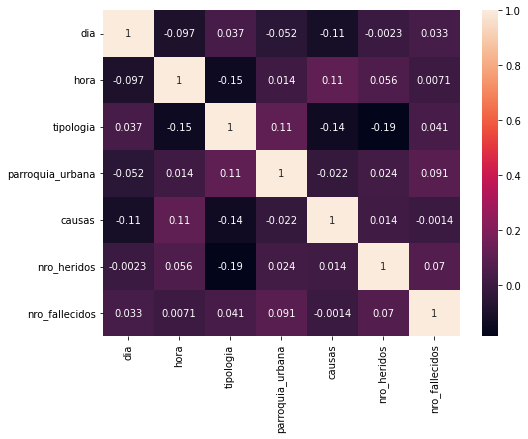

In [27]:
#corelacion
corr_df = df.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [28]:
X = df.iloc[:, [0,2,3,4,5,6]] # atributos de entrada seran las primeras columnas
Y = df.iloc[:,[1]] # atributos de destino

#presentacion de los atributos de entrada
X.head()

,dia,tipologia,parroquia_urbana,causas,nro_heridos,nro_fallecidos
0,1,3,5,9,1,0
1,2,3,4,13,1,0
2,2,5,2,12,1,0
3,2,8,6,6,0,0
4,3,5,1,2,0,0


In [29]:
#presentacion de los atributos de destino
Y.head()

,hora
0,3
1,5
2,4
3,5
4,4


Dividimos nuestros datos en las tablas de testing y training
"X_train" y "y_train", seran para crear el modelo.

"X_test" y "y_test" serviran para saber
que tan bien predice el modelo.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)# stratify=y
print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 822 datos para entrenamiento y 206 datos para prueba


Me muestra la información de la tabla de entrenamiento

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 822 entries, 213 to 28
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   dia               822 non-null    int64
 1   tipologia         822 non-null    int64
 2   parroquia_urbana  822 non-null    int64
 3   causas            822 non-null    int64
 4   nro_heridos       822 non-null    int64
 5   nro_fallecidos    822 non-null    int64
dtypes: int64(6)
memory usage: 45.0 KB


In [32]:
#Cargamos la libreria DecisionTreeClasifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report


#Llamamos al constructor del arbol de decision
classifier = DecisionTreeClassifier(max_depth=3,criterion = 'entropy')

#Entrenamos el modelo
arbol_modelo = classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

Creamos la figura del arbol

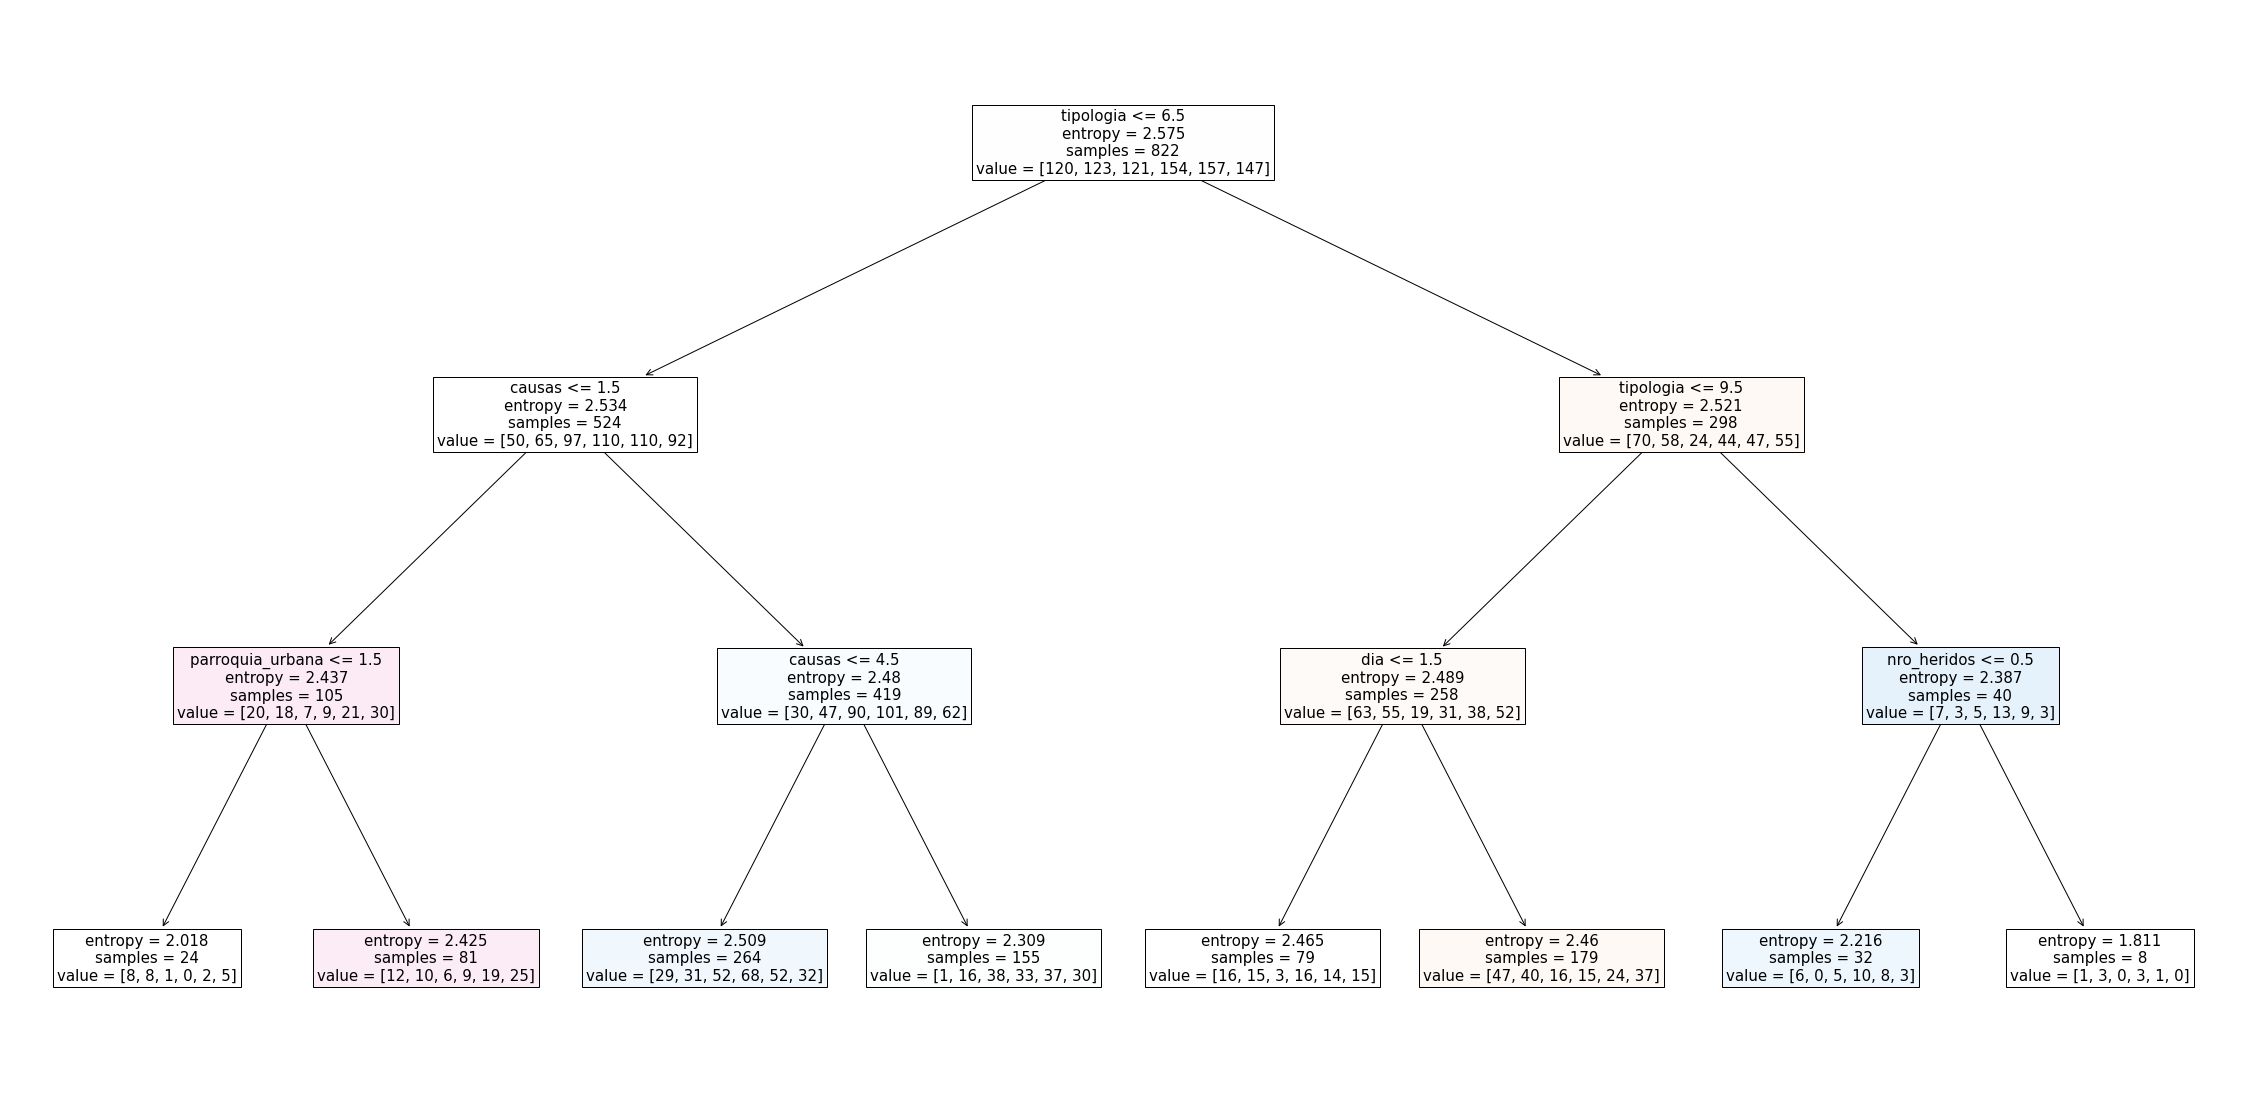

In [33]:
figura_arbol = plt.figure(figsize=(40,20)) # Le indicamos las dimensiones que queremos que tenga
plot_tree(arbol_modelo,feature_names=X.columns,filled=True, fontsize=15)
plt.show()

In [34]:
figura_arbol.savefig("arbol_colab_hora_p3.png")

In [35]:
# Resumen de las predicciones hechas por el clasificador
from sklearn import metrics
reporte = metrics.classification_report(y_test, y_pred,output_dict=True)
pre = pd.DataFrame(reporte).transpose()
print(pre)
pre.to_excel("resumen_precision_hora_p3.xlsx")

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score     support
0              0.282051  0.594595  0.382609   37.000000
1              0.666667  0.064516  0.117647   31.000000
2              0.131579  0.172414  0.149254   29.000000
3              0.171875  0.333333  0.226804   33.000000
4              0.000000  0.000000  0.000000   34.000000
5              0.173913  0.095238  0.123077   42.000000
accuracy       0.213592  0.213592  0.213592    0.213592
macro avg      0.237681  0.210016  0.166565  206.000000
weighted avg   0.232498  0.213592  0.168863  206.000000


In [36]:
y_test.head()

,hora
271,2
369,0
9,4
174,3
32,4


Generamos la matriz de confusión

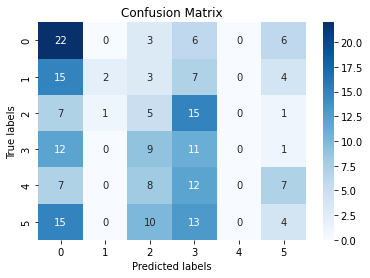

In [37]:
#Matriz de confusion
matriz=confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(matriz, annot=True, cmap="Blues",fmt='g');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

In [38]:
cm = confusion_matrix(y_test, y_pred)

mc= pd.DataFrame(cm)
print(mc)
mc.to_excel("matriz_confusion_hora_p3.xlsx")

    0  1   2   3  4  5
0  22  0   3   6  0  6
1  15  2   3   7  0  4
2   7  1   5  15  0  1
3  12  0   9  11  0  1
4   7  0   8  12  0  7
5  15  0  10  13  0  4


In [39]:
#Para concatenar variables
import pandas as pd

prediccion = pd.DataFrame(y_pred,columns=['hora_prediccion'])
original = y_test
original.reset_index(drop=True, inplace=True)
df_combined = pd.concat([prediccion,original], axis=1)
df_combined.head(10)


,hora_prediccion,hora
0,3,2
1,3,0
2,2,4
3,2,3
4,0,4
5,0,5
6,2,5
7,0,4
8,0,4
9,0,4


In [40]:
#metodo para validar el promedio de exactitud
from sklearn import model_selection
def v_cruzada(arbol_modelo, X_train,y_train):     
    scoring = 'accuracy'
    seed=7
    kfold = model_selection.KFold(n_splits=5, random_state=seed, shuffle = True) ##shuffle para activar el random state
    cv_results = model_selection.cross_val_score(arbol_modelo, X_train, y_train, cv=kfold, scoring=scoring)
    #results.append(cv_results)
    #names.append(name)
    print("Iteraciones validacion cruzada:\n",cv_results)
    msg = "%f (%f)" % (cv_results.mean(), cv_results.std())
    print("Precision media:\n",msg)

In [41]:
#Validación cruzada
v_cruzada(arbol_modelo, X_train,y_train)

Iteraciones validacion cruzada:
 [0.18787879 0.21818182 0.23170732 0.20121951 0.25609756]
Precision media:
 0.219017 (0.023762)


Visualizamos la exactitud del modelo

In [42]:
# Precisión
from sklearn.metrics import accuracy_score, recall_score, precision_score
print('Exactitud árboles de decisión: ',accuracy_score(y_pred,y_test)*100)
print('Exhaustividad árboles de decisión: ', recall_score(y_pred,y_test,average='micro')*100)
print('Precision árboles de decisión: ',accuracy_score(y_pred,y_test)*100)

Exactitud árboles de decisión:  21.35922330097087
Exhaustividad árboles de decisión:  21.35922330097087
Precision árboles de decisión:  21.35922330097087


Transformamos las variables

In [43]:
#transformar datos para visualización de variables predictoras y originales
df_combined['hora']= df_combined['hora'].apply(lambda x: 
                                    'h00-h03' if x == 0 else
                                    'h04-h07' if x == 1 else 
                                    'h08-h11' if x == 2 else 
                                    'h12-h15' if x == 3 else
                                    'h16-h19' if x == 4 else 
                                    'h20-h23')

df_combined['hora_prediccion']= df_combined['hora_prediccion'].apply(lambda x: 
                                    'h00-h03' if x == 0 else
                                    'h04-h07' if x == 1 else 
                                    'h08-h11' if x == 2 else 
                                    'h12-h15' if x == 3 else
                                    'h16-h19' if x == 4 else 
                                    'h20-h23')

Graficamos las estadisticas originales de los datos

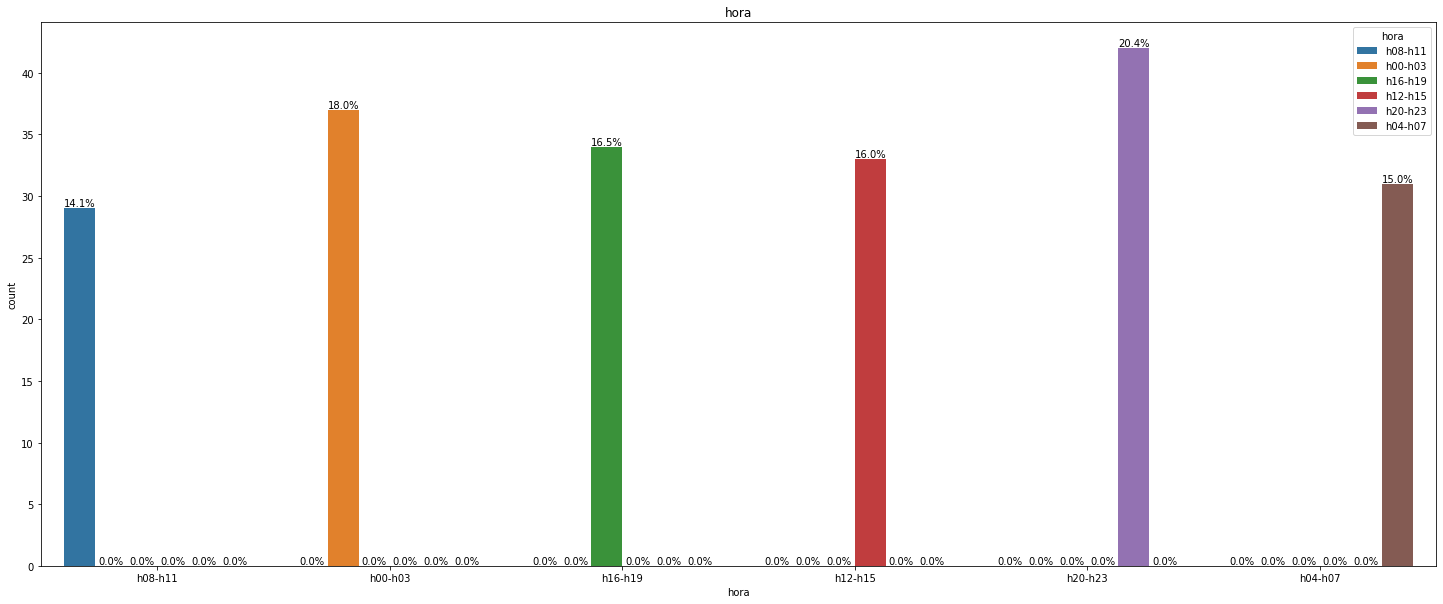

In [44]:
import seaborn as sns #permite generar fácilmente elegantes gráficos, proporciona una interfaz de alto nivel que es realmente sencilla de aprender.
ax = plt.subplots(figsize = (25,10))
ncount=len(df_combined)
#ax[1].plot(df['dia'],df['hora'],color = 'tab:purple')
sns.countplot(x='hora',hue = 'hora', data = df_combined, ax = ax[1]) #Muestre el conteo de observaciones en cada contenedor categórico usando barras.
ax[1].set_title('hora')



for p in ax[1].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax[1].annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

#Guardamos la figura de barras original
#ax[0].savefig("barras_original_hora_p1.png")

Graficamos las estadisticas predecidas de los datos

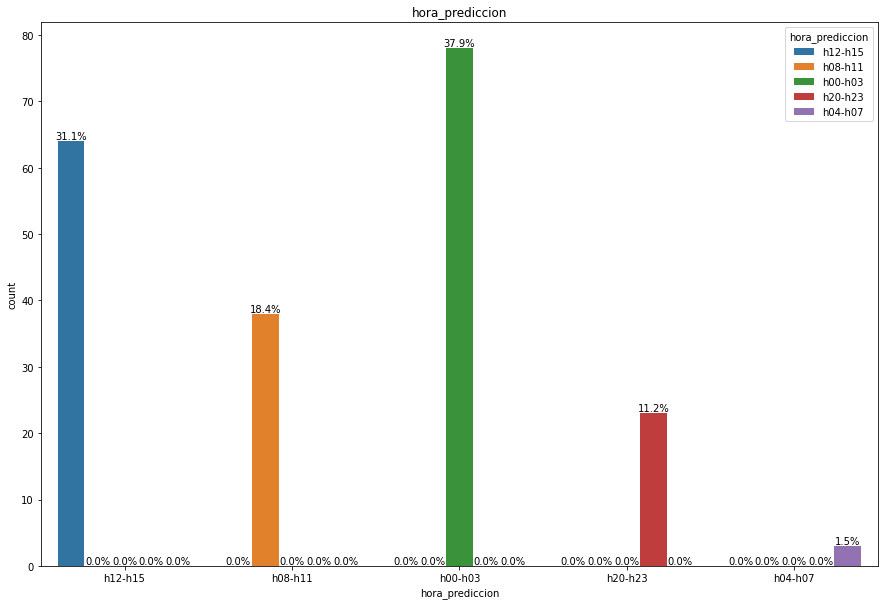

In [45]:
ax = plt.subplots(figsize = (15,10))
ncount=len(df_combined)
sns.countplot(x='hora_prediccion',hue = 'hora_prediccion', data = df_combined, ax = ax[1]) #Muestre el conteo de observaciones en cada contenedor categórico usando barras.
ax[1].set_title('hora_prediccion')


for p in ax[1].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax[1].annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

#Guardamos la figura de barras de predicción
ax[0].savefig("barras_prediccion_hora_p3.png")